In [1]:
import django_pandas.io as djpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
%matplotlib inline

plt.style.use('bmh')

In [2]:
from space.models import SpaceStatus
db_df = djpd.read_frame(SpaceStatus.objects.all())
db_df['delta'] = db_df.time.diff()
clean = db_df[(db_df.delta.dt.total_seconds() > 0) & (db_df.time >= "2013")]
clean_df = clean.set_index(clean.time)
clean_df['was_open'] = clean_df.is_open.shift()

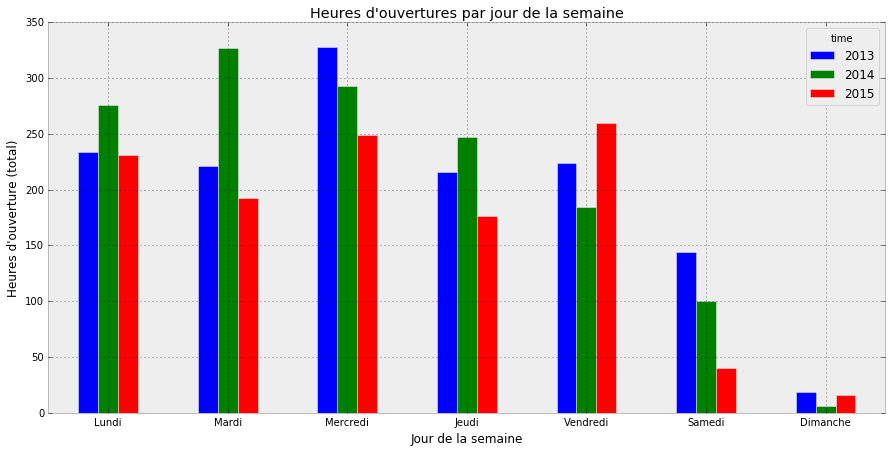

In [3]:
df = clean_df[clean_df.was_open == True]
by_month = df.groupby([df.time.dt.weekday, df.time.dt.year]).delta.sum()
df = by_month.unstack()
df.fillna(0).apply(lambda x: x.dt.total_seconds()/3600).plot(kind='bar', figsize=(15, 7))
plt.title("Heures d'ouvertures par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Heures d'ouverture (total)")
plt.xticks(range(7), ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"], rotation=0)
plt.show()

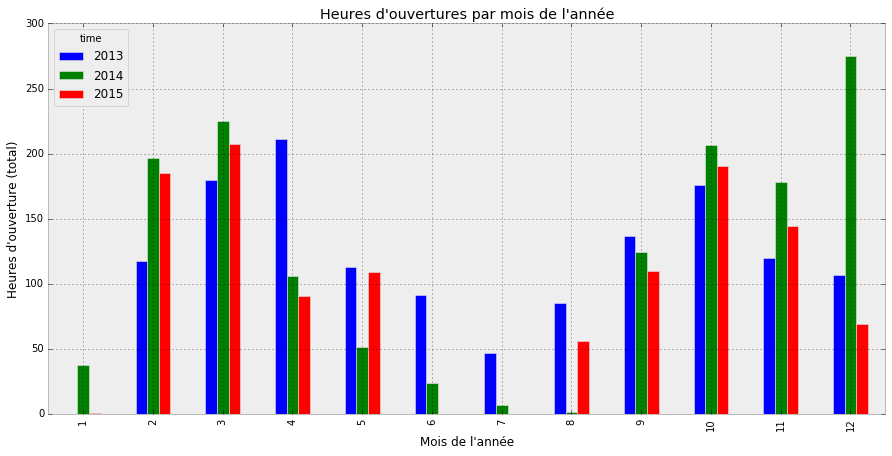

In [4]:
df = clean_df[clean_df.was_open == True]
by_month = df.groupby([df.time.dt.month, df.time.dt.year]).delta.sum()
df = by_month.unstack()
df.fillna(0).apply(lambda x: x.dt.total_seconds()/3600).plot(kind='bar', figsize=(15, 7))
plt.title("Heures d'ouvertures par mois de l'année")
plt.xlabel("Mois de l'année")
plt.ylabel("Heures d'ouverture (total)")
plt.show()

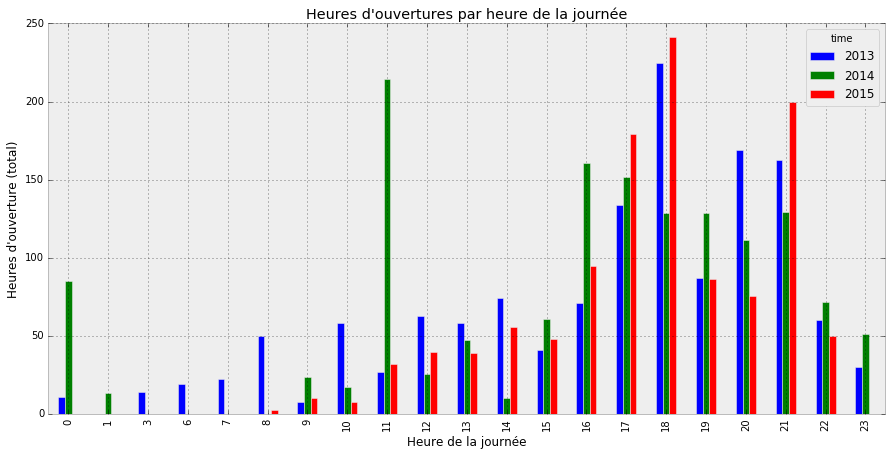

In [5]:
df = clean_df[clean_df.was_open == True]
by_month = df.groupby([df.time.dt.hour, df.time.dt.year]).delta.sum()
df = by_month.unstack()
df.fillna(0).apply(lambda x: x.dt.total_seconds()/3600).plot(kind='bar', figsize=(15, 7))
plt.title("Heures d'ouvertures par heure de la journée")
plt.xlabel("Heure de la journée")
plt.ylabel("Heures d'ouverture (total)")
plt.show()